In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd
# импортируем функцию train_test_split(), с помощью
# которой разбиваем данные на обучающие и тестовые
from sklearn.model_selection import train_test_split
# импортируем библиотеку matplotlib
# для нашей функции plot_hist()
import matplotlib.pyplot as plt
%matplotlib inline
# импортируем модули norm и stats библиотеки scipy для
# построения гистограмм и графиков квантиль-квантиль
from scipy.stats import norm
from scipy import stats
# импортируем библиотеку seaborn для нашей 
# функции diagnostics_skewness()
import seaborn as sns
# импортируем класс PowerTransformer, позволяющий выполнить 
# преобразование Бокса-Кокса/Йео-Джонсона и стандартизацию,
# и функцию cross_val_score для нашей функции importance_auc()
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# импортируем функцию roc_auc_score() для
# вычисления AUC-ROC
from sklearn.metrics import roc_auc_score
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# импортируем классы BaseEstimator и TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pygeohash as gh

In [3]:
# 1) Загрузка данных.

# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 35)

data = pd.read_csv('flat_2.csv', sep=';')
data.head()

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Create
0,10083994,1,Типовая,2,Новосибирск,1,Первомайский,8,Одоевского,1143,1/11,Речной вокзал,291,16760,Студия,23,4,18,Монолит,3,"22,00","12,00","0,00",1340000,"60909,091",0,Отличное,6,Совмещенный,8,"54,9371","83,1011",2014-04-21 11:24:39.767
1,10015724,1,Улучшенной планировки,3,Новосибирск,1,Дзержинский,1,Адриена Лежена,964,23,Золотая Нива,284,683,Изолированная,3,8,14,Кирпич,2,"42,70","22,00","11,80",3250000,"76112,412",0,Хорошее,2,Совмещенный,8,"55,0434","82,9822",2014-12-19 17:41:03.790
2,10014604,1,Типовая,2,Новосибирск,1,Дзержинский,1,Бориса Богаткова,349,243,Золотая Нива,284,366,NaN,0,6,9,Панель,1,"29,90","17,20","5,60",2150000,"71906,355",0,Удовлетворительное,7,Совмещенный,8,"55,0405","82,9801",2013-04-26 09:48:05.307
3,20094604,2,Типовая,2,Новосибирск,1,Советский,9,Лесосечная,980,4,Речной вокзал,291,21770,Изолированная,3,3,9,Панель,1,"46,30","28,50","7,10",2300000,"49676,026",1,NaN,0,Раздельный,9,"54,8902","83,0805",2017-07-26 12:16:17.380
4,30075897,3,Улучшенной планировки,3,Новосибирск,1,Октябрьский,7,Гаранина,495,25/2,Золотая Нива,284,1150,Изолированная,3,2,10,Панель,1,"66,00","42,00","9,00",2950000,"44696,97",0,Хорошее,2,Раздельный,9,"55,0288","82,9703",2016-06-06 15:35:46.470


In [4]:
# смотрим типы переменных и информацию о количестве пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cart_Number     34856 non-null  int64 
 1   Rooms_Number    34856 non-null  int64 
 2   Object_Type     34856 non-null  object
 3   Object_Type_ID  34856 non-null  int64 
 4   Settlement      34856 non-null  object
 5   Settlement_ID   34856 non-null  int64 
 6   District        34856 non-null  object
 7   District_Id     34856 non-null  int64 
 8   Street          34856 non-null  object
 9   Street_Id       34856 non-null  int64 
 10  House_Number    34839 non-null  object
 11  Metro           32952 non-null  object
 12  Metro_ID        34856 non-null  int64 
 13  Metro_m         34856 non-null  int64 
 14  Flats_Plan      26866 non-null  object
 15  Flats_Plan_ID   34856 non-null  int64 
 16  Stor            34856 non-null  int64 
 17  Storeys         34856 non-null  int64 
 18  Wall  

In [5]:
# смотрим еще по другому наличие пропусков
print(data.isnull().sum())

Cart_Number          0
Rooms_Number         0
Object_Type          0
Object_Type_ID       0
Settlement           0
Settlement_ID        0
District             0
District_Id          0
Street               0
Street_Id            0
House_Number        17
Metro             1904
Metro_ID             0
Metro_m              0
Flats_Plan        7990
Flats_Plan_ID        0
Stor                 0
Storeys              0
Wall               553
Wall_ID              0
Space_Total          0
Space_Living         0
Space_Kitchen        0
Value_abs            0
Value_m              0
Balcon_Num           0
Sost              1993
Sost_ID              0
Clozet            1943
Clozet_ID            0
lat                  0
Long                 0
Date_Create          0
dtype: int64


In [6]:
# смотрим статистики количественных переменных
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Cart_Number,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Value_abs,Balcon_Num,Sost_ID,Clozet_ID
count,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000
mean,38852364.878,1.759,2.968,44.367,7.079,1866.086,272.121,5809.013,4.282,5.312,9.375,2.440,2503426.877,0.428,4.235,7.944
std,50624528.994,0.825,3.853,236.387,7.150,2314.029,65.507,16192.766,6.650,3.916,5.012,8.025,1252328.568,0.523,2.677,2.048
min,10386.000,1.000,1.000,1.000,1.000,6.000,0.000,0.000,0.000,1.000,0.000,0.000,610000.000,0.000,0.000,0.000
25%,10075344.750,1.000,2.000,1.000,4.000,615.000,283.000,811.000,1.000,2.000,5.000,1.000,1750000.000,0.000,2.000,8.000
50%,20057076.500,2.000,3.000,1.000,6.000,1093.000,290.000,3590.000,3.000,4.000,9.000,2.000,2280000.000,0.000,4.000,8.000
75%,30074515.750,2.000,3.000,1.000,7.000,1608.000,290.000,6870.000,3.000,7.000,10.000,2.000,2921250.000,1.000,6.000,9.000
max,300711468.000,4.000,44.000,1673.000,64.000,12819.000,294.000,2500000.000,43.000,27.000,28.000,95.000,24000000.000,4.000,11.000,11.000


# 2) Удаление бесполезных переменных.

In [7]:
# переменная - 'Date_Create' 
# это дата сделки, поэтому это временной ряд !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11
# НО ПОКА ЧТО ВРЕМЕННО!!!!!!! - Удаляем ее 

data.drop(['Date_Create'],axis=1, inplace=True)

In [8]:
# Проверка на то, что все пропущенные значение имеют в своих соответствующих ID нулевое значение:

# отключаем предупреждения
warnings.filterwarnings('ignore')

print(data[data['Wall'].isnull()][['Wall','Wall_ID']][data['Wall_ID'] != 0].shape[0])
print(data[data['Metro'].isnull()][['Metro','Metro_ID']][data['Metro_ID'] != 0].shape[0])
print(data[data['Flats_Plan'].isnull()][['Flats_Plan','Flats_Plan_ID']][data['Flats_Plan_ID'] != 0].shape[0])
print(data[data['Sost'].isnull()][['Sost','Sost_ID']][data['Sost_ID'] != 0].shape[0])
print(data[data['Clozet'].isnull()][data['Clozet_ID'] != 0].shape[0])

0
0
0
0
0


In [9]:
# Проверка на то, что все ID-значения с нулевым значением соотетствуют соответствуют пропущенным значениям:

print(data[data['Wall_ID'] == 0][data['Wall'].notnull()].shape[0])
print(data[data['Metro_ID'] == 0][data['Metro'].notnull()].shape[0])
print(data[data['Flats_Plan_ID'] == 0][data['Flats_Plan'].notnull()].shape[0])
print(data[data['Sost_ID'] == 0][data['Sost'].notnull()].shape[0])
print(data[data['Clozet_ID'] == 0][data['Clozet'].notnull()].shape[0])

# включаем предупреждения
warnings.filterwarnings("default")

0
0
0
0
0


In [10]:
# В данном случае - удаляем все переменные у которых есть соответствующие им переменные с ID
# и переменную общей стоимости площади 'Value_abs'

data.drop(['Object_Type','Settlement','District','Street', 'House_Number', 
           'Metro','Flats_Plan','Wall','Sost','Clozet','Cart_Number','Value_abs'],axis=1, inplace=True)
data.columns

Index(['Rooms_Number', 'Object_Type_ID', 'Settlement_ID', 'District_Id',
       'Street_Id', 'Metro_ID', 'Metro_m', 'Flats_Plan_ID', 'Stor', 'Storeys',
       'Wall_ID', 'Space_Total', 'Space_Living', 'Space_Kitchen', 'Value_m',
       'Balcon_Num', 'Sost_ID', 'Clozet_ID', 'lat', 'Long'],
      dtype='object')

In [11]:
# смотрим на типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rooms_Number    34856 non-null  int64 
 1   Object_Type_ID  34856 non-null  int64 
 2   Settlement_ID   34856 non-null  int64 
 3   District_Id     34856 non-null  int64 
 4   Street_Id       34856 non-null  int64 
 5   Metro_ID        34856 non-null  int64 
 6   Metro_m         34856 non-null  int64 
 7   Flats_Plan_ID   34856 non-null  int64 
 8   Stor            34856 non-null  int64 
 9   Storeys         34856 non-null  int64 
 10  Wall_ID         34856 non-null  int64 
 11  Space_Total     34856 non-null  object
 12  Space_Living    34856 non-null  object
 13  Space_Kitchen   34856 non-null  object
 14  Value_m         34856 non-null  object
 15  Balcon_Num      34856 non-null  int64 
 16  Sost_ID         34856 non-null  int64 
 17  Clozet_ID       34856 non-null  int64 
 18  lat   

In [12]:
# Смотрим на переменные имеющие тип object
data[data.dtypes[data.dtypes == 'object'].index].head()

,Space_Total,Space_Living,Space_Kitchen,Value_m,lat,Long
0,"22,00","12,00","0,00","60909,091","54,9371","83,1011"
1,"42,70","22,00","11,80","76112,412","55,0434","82,9822"
2,"29,90","17,20","5,60","71906,355","55,0405","82,9801"
3,"46,30","28,50","7,10","49676,026","54,8902","83,0805"
4,"66,00","42,00","9,00","44696,97","55,0288","82,9703"


## Видим что вместо точек стоят запятые в переменных 'Space_Total','Space_Living','Space_Kitchen', 'Value_m', 'lat','Long'

# 3) Преобразование типов данных.
# 4) Нормализация строковых значений и обработка дублирующих значений..

In [13]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['Space_Total','Space_Living','Space_Kitchen', 'Value_m', 'lat','Long']:
    data[i] = data[i].str.replace(',','.').astype('float')

In [14]:
# смотрим на преобразованные данные в этих столбцах
data[[ 'Space_Total', 'Space_Living',
       'Space_Kitchen', 'Value_m', 'lat',
       'Long']].head()

,Space_Total,Space_Living,Space_Kitchen,Value_m,lat,Long
0,22.000,12.000,0.000,60909.091,54.937,83.101
1,42.700,22.000,11.800,76112.412,55.043,82.982
2,29.900,17.200,5.600,71906.355,55.041,82.980
3,46.300,28.500,7.100,49676.026,54.890,83.081
4,66.000,42.000,9.000,44696.970,55.029,82.970


In [15]:
# смотрим на типы переменных опять
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    34856 non-null  int64  
 1   Object_Type_ID  34856 non-null  int64  
 2   Settlement_ID   34856 non-null  int64  
 3   District_Id     34856 non-null  int64  
 4   Street_Id       34856 non-null  int64  
 5   Metro_ID        34856 non-null  int64  
 6   Metro_m         34856 non-null  int64  
 7   Flats_Plan_ID   34856 non-null  int64  
 8   Stor            34856 non-null  int64  
 9   Storeys         34856 non-null  int64  
 10  Wall_ID         34856 non-null  int64  
 11  Space_Total     34856 non-null  float64
 12  Space_Living    34856 non-null  float64
 13  Space_Kitchen   34856 non-null  float64
 14  Value_m         34856 non-null  float64
 15  Balcon_Num      34856 non-null  int64  
 16  Sost_ID         34856 non-null  int64  
 17  Clozet_ID       34856 non-null 

In [16]:
# Смотрим на переменные имеющие тип int
data[data.dtypes[data.dtypes == 'int64'].index].head()

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Balcon_Num,Sost_ID,Clozet_ID
0,1,2,1,8,1143,291,16760,23,4,18,3,0,6,8
1,1,3,1,1,964,284,683,3,8,14,2,0,2,8
2,1,2,1,1,349,284,366,0,6,9,1,0,7,8
3,2,2,1,9,980,291,21770,3,3,9,1,1,0,9
4,3,3,1,7,495,284,1150,3,2,10,1,0,2,9


In [17]:
# Смотрим на количество уникальных значений для этих столбцов
data[data.dtypes[data.dtypes == 'int64'].index].nunique().sort_values(ascending=False)

Metro_m           2585
Street_Id          913
Settlement_ID       87
Storeys             29
Stor                27
Object_Type_ID      26
District_Id         24
Wall_ID             18
Flats_Plan_ID       18
Metro_ID            16
Clozet_ID           12
Sost_ID              8
Balcon_Num           5
Rooms_Number         4
dtype: int64

# 6) Импутация пропусков, котор.можно выполнить до разбиения/перекр.проверки.

In [18]:
# проверяем наличие пропусков
print(data.isnull().sum())

Rooms_Number      0
Object_Type_ID    0
Settlement_ID     0
District_Id       0
Street_Id         0
Metro_ID          0
Metro_m           0
Flats_Plan_ID     0
Stor              0
Storeys           0
Wall_ID           0
Space_Total       0
Space_Living      0
Space_Kitchen     0
Value_m           0
Balcon_Num        0
Sost_ID           0
Clozet_ID         0
lat               0
Long              0
dtype: int64


In [19]:
# смотрим статистики количественных переменных
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost_ID,Clozet_ID,lat,Long
count,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000
mean,1.759,2.968,44.367,7.079,1866.086,272.121,5809.013,4.282,5.312,9.375,2.440,45.638,26.007,7.223,55475.020,0.428,4.235,7.944,54.973,82.911
std,0.825,3.853,236.387,7.150,2314.029,65.507,16192.766,6.650,3.916,5.012,8.025,25.280,16.392,4.419,14442.254,0.523,2.677,2.048,1.181,1.795
min,1.000,1.000,1.000,1.000,6.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,1.000,4.000,615.000,283.000,811.000,1.000,2.000,5.000,1.000,32.000,17.000,5.700,46210.721,0.000,2.000,8.000,54.964,82.899
50%,2.000,3.000,1.000,6.000,1093.000,290.000,3590.000,3.000,4.000,9.000,2.000,43.000,25.000,7.000,54054.054,0.000,4.000,8.000,55.005,82.945
75%,2.000,3.000,1.000,7.000,1608.000,290.000,6870.000,3.000,7.000,10.000,2.000,56.500,33.000,9.000,63636.364,1.000,6.000,9.000,55.047,82.993
max,4.000,44.000,1673.000,64.000,12819.000,294.000,2500000.000,43.000,27.000,28.000,95.000,3217.000,1806.000,101.000,544512.195,4.000,11.000,11.000,57.193,84.422


In [20]:
# выведем наибольшие значений Metro_m
data['Metro_m'].nlargest(30)

17337    2500000
9654     1000000
13511     290000
13512     290000
13906     100000
17105      75000
7325       61800
14420      61800
19894      61800
27444      61800
27474      61800
20767      60163
5965       60020
1442       60000
1443       60000
4102       60000
4618       60000
6047       60000
7833       60000
8756       60000
10545      60000
11450      60000
12299      60000
12620      60000
13978      60000
14289      60000
18886      60000
19980      60000
20725      60000
22115      60000
Name: Metro_m, dtype: int64

In [21]:
distance_threshold = 15000

In [23]:
# все значения переменной Metro_ID
# больше distance_threshold пометим как отсутствие метро
data['Metro_m'] = np.where(data['Metro_m'] > distance_threshold, 0, data['Metro_m'])
data['Metro_ID'] = np.where(data['Metro_m'] > distance_threshold,0, data['Metro_ID'])

# 5) Обработка редк.категорий, котор.можно выполнить до разбиения/перекр.проверки.

In [24]:
# смотрим частоты  переменных c типом 'int64' 
for col in data.dtypes[data.dtypes == 'int64'].index:
    print(data[col].value_counts(dropna=False))

1    16202
2    11697
3     6103
4      854
Name: Rooms_Number, dtype: int64
3     17389
1      7481
2      6645
4      1431
7       818
5       548
42      222
17      127
29       81
27       44
25       11
6        10
14        9
28        7
20        6
12        6
24        6
21        4
16        3
31        2
8         1
9         1
44        1
19        1
22        1
13        1
Name: Object_Type_ID, dtype: int64
1       32103
2         987
3         251
291       244
42        233
        ...  
1573        1
1483        1
1530        1
1532        1
1535        1
Name: Settlement_ID, Length: 87, dtype: int64
6     5717
7     5430
5     4626
4     3579
1     3199
3     3013
8     2373
10    1590
9     1417
33    1181
2     1158
15     988
19     285
50     185
57      54
51      18
48      15
59      12
55      10
60       2
52       1
56       1
58       1
64       1
Name: District_Id, dtype: int64
693      835
1143     808
8054     799
485      786
1238     774
        ... 
12

In [25]:
# смотрим снова частоты категорий ( переменных c типом 'int64' )
for col in data.dtypes[data.dtypes == 'int64'].index:
    print(data[col].value_counts(dropna=False))

1    16202
2    11697
3     6103
4      854
Name: Rooms_Number, dtype: int64
3     17389
1      7481
2      6645
4      1431
7       818
5       548
42      222
17      127
29       81
27       44
25       11
6        10
14        9
28        7
20        6
12        6
24        6
21        4
16        3
31        2
8         1
9         1
44        1
19        1
22        1
13        1
Name: Object_Type_ID, dtype: int64
1       32103
2         987
3         251
291       244
42        233
        ...  
1573        1
1483        1
1530        1
1532        1
1535        1
Name: Settlement_ID, Length: 87, dtype: int64
6     5717
7     5430
5     4626
4     3579
1     3199
3     3013
8     2373
10    1590
9     1417
33    1181
2     1158
15     988
19     285
50     185
57      54
51      18
48      15
59      12
55      10
60       2
52       1
56       1
58       1
64       1
Name: District_Id, dtype: int64
693      835
1143     808
8054     799
485      786
1238     774
        ... 
12

In [26]:
data.head(20)

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost_ID,Clozet_ID,lat,Long
0,1,2,1,8,1143,291,0,23,4,18,3,22.000,12.000,0.000,60909.091,0,6,8,54.937,83.101
1,1,3,1,1,964,284,683,3,8,14,2,42.700,22.000,11.800,76112.412,0,2,8,55.043,82.982
2,1,2,1,1,349,284,366,0,6,9,1,29.900,17.200,5.600,71906.355,0,7,8,55.041,82.980
3,2,2,1,9,980,291,0,3,3,9,1,46.300,28.500,7.100,49676.026,1,0,9,54.890,83.081
4,3,3,1,7,495,284,1150,3,2,10,1,66.000,42.000,9.000,44696.970,0,2,9,55.029,82.970
5,3,2,1,9,980,291,0,2,4,10,1,59.000,38.000,10.000,47457.627,1,2,9,54.890,83.077
6,1,3,1,9,1835,291,0,3,9,10,2,47.000,31.200,0.000,67659.574,0,5,8,54.888,83.096
7,3,3,1,9,1835,291,0,3,10,10,1,64.000,39.000,11.000,59375.000,0,6,9,54.889,83.100
8,2,2,1,7,348,284,682,3,5,9,1,46.000,27.000,7.000,65217.391,1,2,9,55.033,82.976
9,2,2,1,7,348,284,568,3,4,9,1,46.600,28.600,7.200,60085.837,1,2,9,55.034,82.976


In [27]:
# смотрим еще раз статистики количественных переменных

# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 36)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost_ID,Clozet_ID,lat,Long
count,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000
mean,1.759,2.968,44.367,7.079,1866.086,272.121,3047.093,4.282,5.312,9.375,2.440,45.638,26.007,7.223,55475.020,0.428,4.235,7.944,54.973,82.911
std,0.825,3.853,236.387,7.150,2314.029,65.507,3061.363,6.650,3.916,5.012,8.025,25.280,16.392,4.419,14442.254,0.523,2.677,2.048,1.181,1.795
min,1.000,1.000,1.000,1.000,6.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,1.000,4.000,615.000,283.000,451.000,1.000,2.000,5.000,1.000,32.000,17.000,5.700,46210.721,0.000,2.000,8.000,54.964,82.899
50%,2.000,3.000,1.000,6.000,1093.000,290.000,2001.000,3.000,4.000,9.000,2.000,43.000,25.000,7.000,54054.054,0.000,4.000,8.000,55.005,82.945
75%,2.000,3.000,1.000,7.000,1608.000,290.000,5530.000,3.000,7.000,10.000,2.000,56.500,33.000,9.000,63636.364,1.000,6.000,9.000,55.047,82.993
max,4.000,44.000,1673.000,64.000,12819.000,294.000,15000.000,43.000,27.000,28.000,95.000,3217.000,1806.000,101.000,544512.195,4.000,11.000,11.000,57.193,84.422


In [28]:
# Видим что есть нулевые значения площадей - Space_Total,Space_Living
# нулевые значения Space_Total - то пропуски, которые тоже нужно ка кто импутировать.

# нулевые начения переменной Space_Living НЕ записываем как пропуски
# так как это может означать нежилые помещения

### Далее, возможно большие выбросы в большую сторону по переменным Space_Total,Space_Living,Space_Kitchen.
### указываюь на редкое элитное жилье, типа особняков с огромными площадями,
### или на большие промышленные помещения.
### Посмотрим на данные записи :

In [29]:
# выведем 10 наибольших значений Space_Total
data['Space_Total'].nlargest(10)

4663    3217.000
6405     655.000
3828     275.200
21031    260.000
29596    260.000
23416    254.000
23472    232.700
15825    218.000
23240    218.000
18396    205.000
Name: Space_Total, dtype: float64

# 7) Конструирование признаков, котор.можно выполнить до разбиения/перекр.проверки.

In [30]:
 # создаем индикатор возможного нежилого помещения
data['Nonresidential'] = np.where(
    data['Space_Living'] == 0, 1, 0)

data[data['Space_Living'] == 0]

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost_ID,Clozet_ID,lat,Long,Nonresidential
28,1,3,1,1,645,284,2160,23,6,9,2,37.000,0.000,0.000,52702.703,0,2,8,55.052,82.993,1
37,1,3,1361,33,6014,291,2061,0,8,9,2,43.400,0.000,9.600,58179.724,0,2,8,54.945,83.194,1
38,2,1,1,7,964,284,1250,3,2,5,1,0.000,0.000,0.000,0.000,1,2,8,55.039,82.986,1
44,2,2,2,15,125,291,5250,3,5,5,1,44.000,0.000,0.000,35454.545,1,0,0,54.751,83.090,1
119,1,3,1361,33,8330,291,18,23,7,9,2,23.000,0.000,0.000,67391.304,0,9,8,54.938,83.196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34798,2,3,1,3,927,0,0,23,6,10,2,41.900,0.000,0.000,71599.045,1,9,8,55.136,82.894,1
34799,2,3,1,3,927,0,0,23,6,10,2,41.900,0.000,0.000,71599.045,1,9,8,55.136,82.894,1
34808,2,2,1,2,1375,289,872,0,7,9,2,44.000,0.000,0.000,68181.818,0,0,0,55.025,82.909,1
34829,2,1,2,15,62,0,0,0,2,4,2,0.000,0.000,0.000,0.000,1,2,0,54.761,83.102,1


In [31]:
# создаем индикатор помещения без кухни (студии или промыщленные помещения?, или незаполненные данные?)
data['WithoutKitchen'] = np.where(
    data['Space_Kitchen'] == 0, 1, 0)

data[data['Space_Kitchen'] == 0]

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost_ID,Clozet_ID,lat,Long,Nonresidential,WithoutKitchen
0,1,2,1,8,1143,291,0,23,4,18,3,22.000,12.000,0.000,60909.091,0,6,8,54.937,83.101,0,1
6,1,3,1,9,1835,291,0,3,9,10,2,47.000,31.200,0.000,67659.574,0,5,8,54.888,83.096,0,1
15,1,3,1,8,1143,291,0,0,12,17,3,23.400,15.600,0.000,44230.769,0,9,8,54.937,83.106,0,1
16,1,3,1,8,1143,291,0,0,9,18,3,23.300,14.000,0.000,54506.438,1,6,8,54.938,83.105,0,1
25,1,3,1,1,964,284,1100,0,16,16,2,36.000,18.200,0.000,76111.111,0,0,0,55.045,82.983,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34798,2,3,1,3,927,0,0,23,6,10,2,41.900,0.000,0.000,71599.045,1,9,8,55.136,82.894,1,1
34799,2,3,1,3,927,0,0,23,6,10,2,41.900,0.000,0.000,71599.045,1,9,8,55.136,82.894,1,1
34808,2,2,1,2,1375,289,872,0,7,9,2,44.000,0.000,0.000,68181.818,0,0,0,55.025,82.909,1,1
34829,2,1,2,15,62,0,0,0,2,4,2,0.000,0.000,0.000,0.000,1,2,0,54.761,83.102,1,1


 # Оценим графически распределение переменных :

In [32]:
# функция, которая строит гистограммы
# распределения и графики квантиль-квантиль
def plot_hist(df):
    # создаем копию датафрейма
    df_ = df.copy()
    # отбираем столбцы, у которых больше 20 уникальных значений
    df_ = df_.loc[:, df.apply(pd.Series.nunique) > 20]
    # из этих столбцов отбираем только количественные
    num_cols = df_.select_dtypes(include=['number']).columns
    for col in num_cols:
        df_[col].fillna(df_[col].median(), inplace=True)
        # строим гистограмму
        sns.distplot(df_[col], fit=norm)
        fig = plt.figure();
        # строим график квантиль-квантиль
        stats.probplot(df_[col], plot=plt)
        fig = plt.figure();

D:\Anaconda3\envs\Cv1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\Cv1\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\Anaconda3\envs\Cv1\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\Anaconda3\envs\Cv1\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the

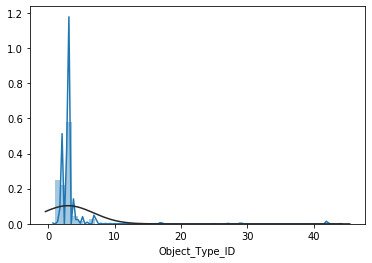

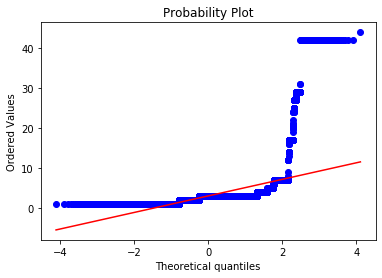

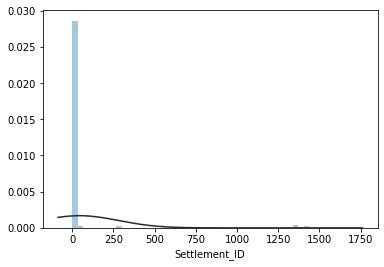

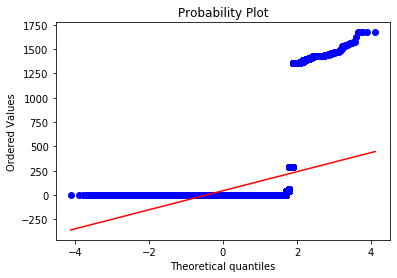

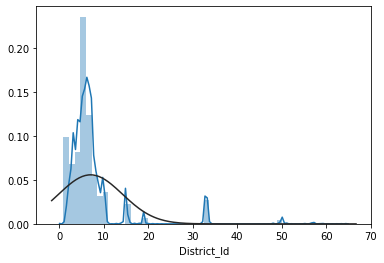

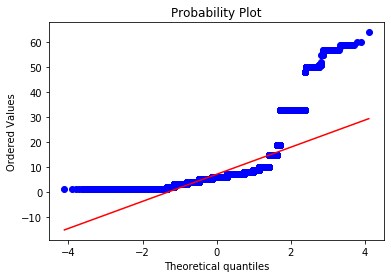

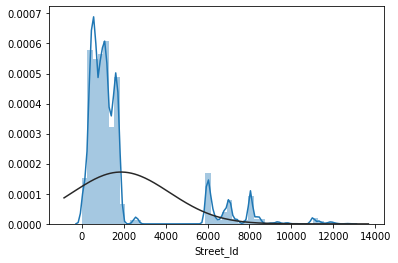

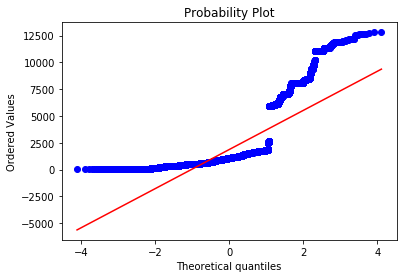

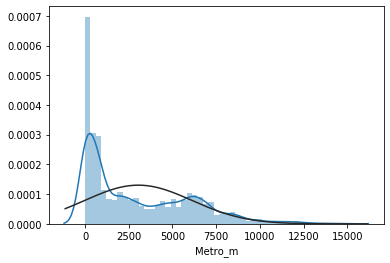

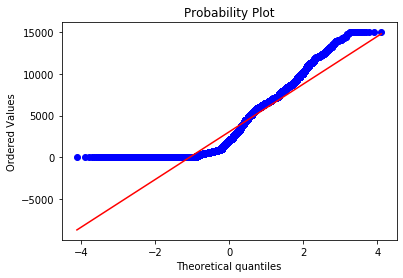

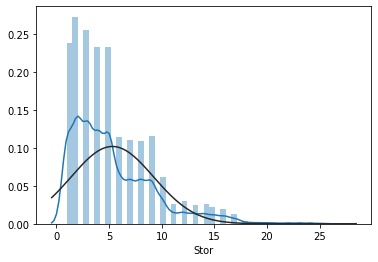

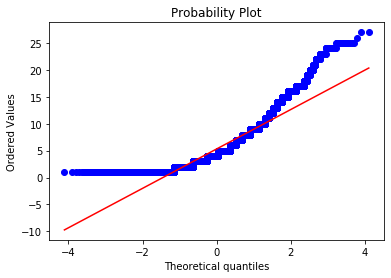

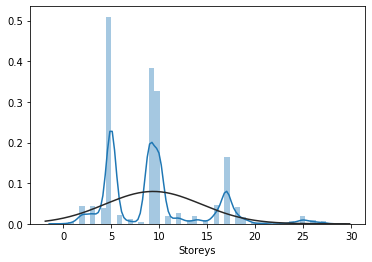

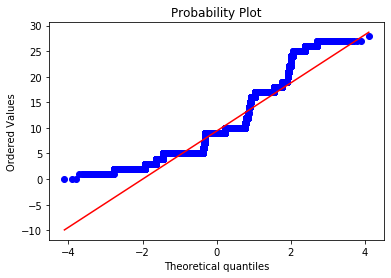

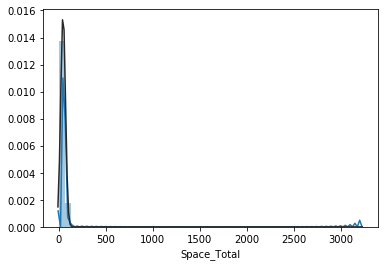

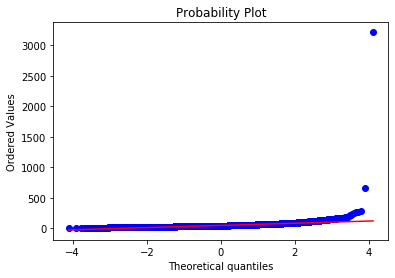

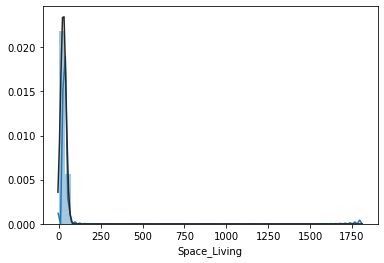

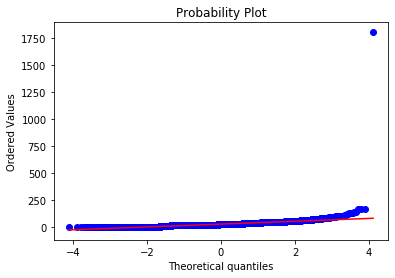

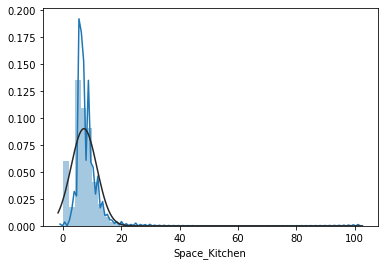

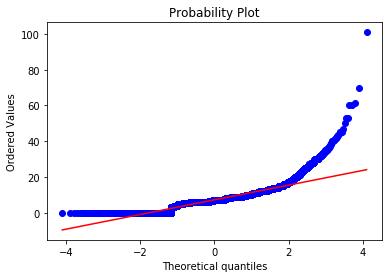

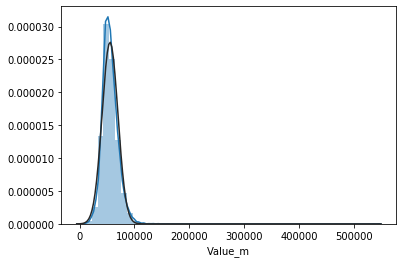

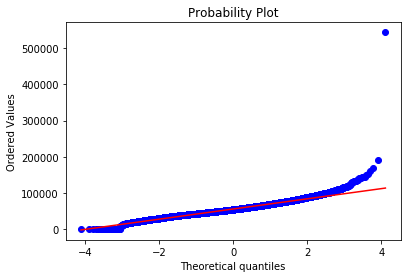

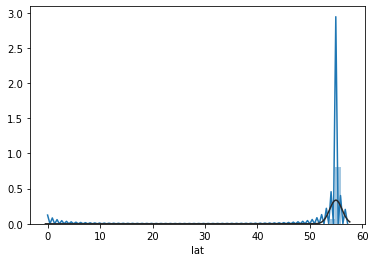

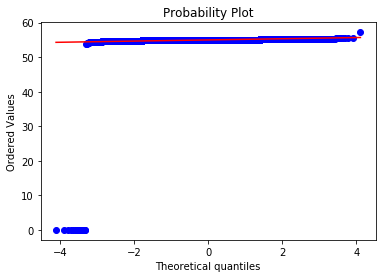

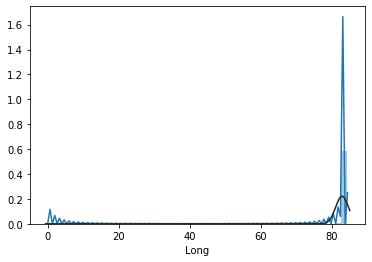

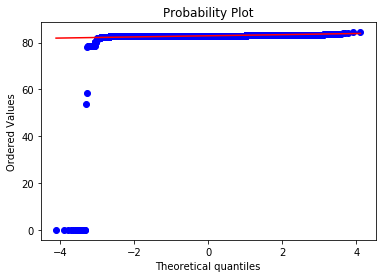

<Figure size 432x288 with 0 Axes>

In [33]:
# применяем функцию plot_hist()
plot_hist(data)

In [34]:
#  в зависимой переменной Value_m какие то нулевые значение(что ввроде бы не может быть) 
# и так же подозрительно резко  большие(до 544512.195 !!! )
# ХОТЕЛОСЬ БЫ ПРОЯСНИТЬ ЧТО ЭТО !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Очистка по зависимой переменной

In [35]:
data.shape

(34856, 22)

In [36]:
data = data.query("Value_m != 0")

In [37]:
data.shape

(34818, 22)

In [38]:
# выведем 10 наибольших значений Value_m
data['Value_m'].nlargest(100)

9547    544512.195
1175    190476.190
27961   169902.913
8816    160621.762
10473   153409.091
           ...    
10368   107594.937
32196   107352.941
6742    107142.857
9093    107023.411
10595   106896.552
Name: Value_m, Length: 100, dtype: float64

In [39]:
data = data.query("Value_m < 200000")

In [40]:
data.shape

(34817, 22)

In [41]:
# Для борьбы с выбросами, возможно хорошо было бы применить к перееменным Metro_m, Space_Total,Space_Living,Space_Kitchen,
# преобразование максимизирующее нормальность  или виндризацию

In [42]:
# функция, вычисляющая скос 
# после преобразований
def diagnostics_skewness(df, strategy):
    # создаем списки
    col_list = df.select_dtypes(include=['number']).columns
    skew_initial_list = []
    skew_pos_reciprocal_list = []
    skew_neg_reciprocal_list = []
    skew_log_list = []
    skew_corr_log_001_list = []
    skew_corr_log_01_list = []
    skew_corr_log_1_list = []
    skew_corr_log_5_list = []
    skew_cbrt_list = []
    skew_sqrt_list = []
    
    # создаем копию датафрейма
    df_ = df.copy()
    # запускаем цикл, который вычисляет скос по каждой 
    # преобразованной переменной
    for col in col_list:
        # импутируем пропуски в зависимости от заданной стратегии
        if strategy == 'median':
            df_[col] = df_[col].fillna(df_[col].median())
        if strategy == 'mean':
            df_[col] = df_[col].fillna(df_[col].mean())
        if strategy == 'zero':
            df_[col] = df_[col].fillna(0)
            
        skew_initial = df_[col].skew()
        skew_pos_reciprocal = (1 / (df_[col].clip(0.01))).skew()
        skew_neg_reciprocal = (-1 / (df_[col].clip(0.01))).skew()
        skew_log = np.log(df[col].clip(0.01)).skew()
        skew_corr_log_001 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.001).skew()
        skew_corr_log_01 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.01).skew()
        skew_corr_log_1 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.1).skew()
        skew_corr_log_5 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.5).skew()
        skew_cbrt = np.cbrt(df_[col].abs()).skew()
        skew_sqrt = np.sqrt(df_[col].abs()).skew()
        skew_initial_list.append(skew_initial)
        skew_pos_reciprocal_list.append(skew_pos_reciprocal)
        skew_neg_reciprocal_list.append(skew_neg_reciprocal)
        skew_log_list.append(skew_log)
        skew_corr_log_001_list.append(skew_corr_log_001)
        skew_corr_log_01_list.append(skew_corr_log_01)
        skew_corr_log_1_list.append(skew_corr_log_1)
        skew_corr_log_5_list.append(skew_corr_log_5)
        skew_cbrt_list.append(skew_cbrt)
        skew_sqrt_list.append(skew_sqrt)   

    result = pd.DataFrame({'Переменная': col_list,
                           'Skew_init': skew_initial_list,
                           'Skew_pos_recip': skew_pos_reciprocal_list,
                           'Skew_neg_recip': skew_neg_reciprocal_list,
                           'Skew_log': skew_log_list,
                           'Skew_adj_log (k=0.001)': skew_corr_log_001_list,
                           'Skew_adj_log (k=0.01)': skew_corr_log_01_list,
                           'Skew_adj_log (k=0.1)': skew_corr_log_1_list,
                           'Skew_adj_log (k=0.5)': skew_corr_log_5_list,
                           'Skew_cbrt': skew_cbrt_list,
                           'Skew_sqrt': skew_sqrt_list})
    result = np.round(result.sort_values(by='Skew_init', ascending=False), 3)
    cm = sns.light_palette('magenta', as_cmap=True)
    return(result.style.background_gradient(cmap=cm))

In [43]:
 # Задаем некоторые опции библиотеки pandas, которые настраивают вывод -
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  

# применяем нашу функцию
diagnostics_skewness(data, strategy='median')

,Переменная,Skew_init,Skew_pos_recip,Skew_neg_recip,Skew_log,Skew_adj_log (k=0.001),Skew_adj_log (k=0.01),Skew_adj_log (k=0.1),Skew_adj_log (k=0.5),Skew_cbrt,Skew_sqrt
11,Space_Total,57.957000,1.139000,-1.139000,0.116000,0.117000,0.130000,0.246000,0.602000,0.960000,2.372000
12,Space_Living,37.336000,4.246000,-4.246000,-3.831000,-3.672000,-3.189000,-1.923000,-0.647000,-2.149000,-0.602000
10,Wall_ID,10.145000,7.746000,-7.746000,-2.090000,-1.834000,-0.523000,2.298000,4.845000,5.081000,7.920000
1,Object_Type_ID,8.069000,1.031000,-1.031000,0.839000,0.843000,0.878000,1.213000,2.348000,3.040000,4.462000
2,Settlement_ID,5.498000,-3.553000,3.553000,4.641000,4.647000,4.691000,4.845000,5.016000,5.081000,5.246000
20,Nonresidential,4.246000,-4.246000,4.246000,4.246000,4.246000,4.246000,4.246000,4.246000,4.246000,4.246000
3,District_Id,3.759000,2.236000,-2.236000,-0.175000,-0.169000,-0.119000,0.281000,1.197000,1.182000,1.900000
21,WithoutKitchen,2.380000,-2.380000,2.380000,2.380000,2.380000,2.380000,2.380000,2.380000,2.380000,2.380000
7,Flats_Plan_ID,2.370000,1.290000,-1.290000,-0.983000,-0.945000,-0.735000,0.079000,1.206000,0.091000,1.146000
4,Street_Id,2.208000,20.177000,-20.177000,0.027000,0.064000,0.257000,0.811000,1.378000,1.239000,1.582000


In [44]:
# Возможно в дальнейшем для некоторых переменных и некоторых моделей будет полезно 
# применить преобразования максимизирующее нормальность

In [45]:
#data['geohash4'] = data.apply(lambda x: gh.encode(x['lat'],x['Long'], precision=4), axis = 1 )
data['geohash5'] = data.apply(lambda x: gh.encode(x['lat'],x['Long'], precision=5), axis = 1 )
data['geohash6'] = data.apply(lambda x: gh.encode(x['lat'],x['Long'], precision=6), axis = 1 )

In [46]:
# смотрим на типы переменных опять
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34817 entries, 0 to 34855
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    34817 non-null  int64  
 1   Object_Type_ID  34817 non-null  int64  
 2   Settlement_ID   34817 non-null  int64  
 3   District_Id     34817 non-null  int64  
 4   Street_Id       34817 non-null  int64  
 5   Metro_ID        34817 non-null  int64  
 6   Metro_m         34817 non-null  int64  
 7   Flats_Plan_ID   34817 non-null  int64  
 8   Stor            34817 non-null  int64  
 9   Storeys         34817 non-null  int64  
 10  Wall_ID         34817 non-null  int64  
 11  Space_Total     34817 non-null  float64
 12  Space_Living    34817 non-null  float64
 13  Space_Kitchen   34817 non-null  float64
 14  Value_m         34817 non-null  float64
 15  Balcon_Num      34817 non-null  int64  
 16  Sost_ID         34817 non-null  int64  
 17  Clozet_ID       34817 non-null 

In [47]:
# выполняем дамми-кодирование 
# ТАК НЕЛЬЗЯ ВРОДЕ, ДО РАЗБИЕНИЯ, НО ПОТОМ РАЗБЕРУСЬ КАК СДЕЛАТЬ ПОСЛЕ РАЗБИЕНИЯ ЭТО !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#data = pd.get_dummies(data)

In [48]:
#from category_encoders import TargetEncoder
#from category_encoders import LeaveOneOutEncoder
from category_encoders import OrdinalEncoder

D:\Anaconda3\envs\Cv1\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [49]:
# создаем списки количественных
# и категориальных столбцов
cat_cols = data.dtypes[data.dtypes == 'object'].index
num_cols = data.dtypes[data.dtypes != 'object'].index

In [50]:
# use target encoding to encode two categorical features
encoder = OrdinalEncoder(cols=cat_cols)

In [51]:
data = encoder.fit_transform(data)
data.head(10)

,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,...,Long,Nonresidential,WithoutKitchen,geohash5,geohash6
0,1,2,1,8,1143,...,83.101,0,1,1,1
1,1,3,1,1,964,...,82.982,0,0,2,2
2,1,2,1,1,349,...,82.980,0,0,2,3
3,2,2,1,9,980,...,83.081,0,0,3,4
4,3,3,1,7,495,...,82.970,0,0,2,5
5,3,2,1,9,980,...,83.077,0,0,3,6
6,1,3,1,9,1835,...,83.096,0,1,3,7
7,3,3,1,9,1835,...,83.100,0,0,3,7
8,2,2,1,7,348,...,82.976,0,0,2,8
9,2,2,1,7,348,...,82.976,0,0,2,8


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34817 entries, 0 to 34855
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    34817 non-null  int64  
 1   Object_Type_ID  34817 non-null  int64  
 2   Settlement_ID   34817 non-null  int64  
 3   District_Id     34817 non-null  int64  
 4   Street_Id       34817 non-null  int64  
 5   Metro_ID        34817 non-null  int64  
 6   Metro_m         34817 non-null  int64  
 7   Flats_Plan_ID   34817 non-null  int64  
 8   Stor            34817 non-null  int64  
 9   Storeys         34817 non-null  int64  
 10  Wall_ID         34817 non-null  int64  
 11  Space_Total     34817 non-null  float64
 12  Space_Living    34817 non-null  float64
 13  Space_Kitchen   34817 non-null  float64
 14  Value_m         34817 non-null  float64
 15  Balcon_Num      34817 non-null  int64  
 16  Sost_ID         34817 non-null  int64  
 17  Clozet_ID       34817 non-null 

In [53]:
# удалим их из набора данных category_encodersя 'lat','Long' :
#data.drop(['lat','Long'],axis=1, inplace=True)
data.columns

Index(['Rooms_Number', 'Object_Type_ID', 'Settlement_ID', 'District_Id',
       'Street_Id', 'Metro_ID', 'Metro_m', 'Flats_Plan_ID', 'Stor', 'Storeys',
       'Wall_ID', 'Space_Total', 'Space_Living', 'Space_Kitchen', 'Value_m',
       'Balcon_Num', 'Sost_ID', 'Clozet_ID', 'lat', 'Long', 'Nonresidential',
       'WithoutKitchen', 'geohash5', 'geohash6'],
      dtype='object')

In [54]:
# создаем обучающий массив признаков, тестовый массив признаков,
# обучающий массив меток, тестовый массив меток
train, test, y_train, y_test = train_test_split(data.drop('Value_m', axis=1), 
                                                data['Value_m'], 
                                                test_size=.3, 
                                                #stratify=data['Value_m'], 
                                                random_state=100)

# 1) Преобразования максимизирующие нормальность, обработка выбросов.


# 2) Обработка редк.категорий, котор.можно выполнить только после разбиения/внутри перекр.проверки.


# 3) Импутация пропусков, котор.можно выполнить только после разбиения/внутри перекр.проверки.


In [55]:
# проверяем наличие пропусков
print(data.isnull().sum())

Rooms_Number      0
Object_Type_ID    0
Settlement_ID     0
District_Id       0
Street_Id         0
Metro_ID          0
Metro_m           0
Flats_Plan_ID     0
Stor              0
Storeys           0
Wall_ID           0
Space_Total       0
Space_Living      0
Space_Kitchen     0
Value_m           0
Balcon_Num        0
Sost_ID           0
Clozet_ID         0
lat               0
Long              0
Nonresidential    0
WithoutKitchen    0
geohash5          0
geohash6          0
dtype: int64


# 4) Конструирование признаков, котор.можно выполнить только после разбиения/внутри перекр.проверки.


# 5) Стандартизация, дамми-кодирование.

In [56]:
# смотрим на типы переменных опять
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24371 entries, 12418 to 14164
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    24371 non-null  int64  
 1   Object_Type_ID  24371 non-null  int64  
 2   Settlement_ID   24371 non-null  int64  
 3   District_Id     24371 non-null  int64  
 4   Street_Id       24371 non-null  int64  
 5   Metro_ID        24371 non-null  int64  
 6   Metro_m         24371 non-null  int64  
 7   Flats_Plan_ID   24371 non-null  int64  
 8   Stor            24371 non-null  int64  
 9   Storeys         24371 non-null  int64  
 10  Wall_ID         24371 non-null  int64  
 11  Space_Total     24371 non-null  float64
 12  Space_Living    24371 non-null  float64
 13  Space_Kitchen   24371 non-null  float64
 14  Balcon_Num      24371 non-null  int64  
 15  Sost_ID         24371 non-null  int64  
 16  Clozet_ID       24371 non-null  int64  
 17  lat             24371 non-n

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10446 entries, 18679 to 7518
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    10446 non-null  int64  
 1   Object_Type_ID  10446 non-null  int64  
 2   Settlement_ID   10446 non-null  int64  
 3   District_Id     10446 non-null  int64  
 4   Street_Id       10446 non-null  int64  
 5   Metro_ID        10446 non-null  int64  
 6   Metro_m         10446 non-null  int64  
 7   Flats_Plan_ID   10446 non-null  int64  
 8   Stor            10446 non-null  int64  
 9   Storeys         10446 non-null  int64  
 10  Wall_ID         10446 non-null  int64  
 11  Space_Total     10446 non-null  float64
 12  Space_Living    10446 non-null  float64
 13  Space_Kitchen   10446 non-null  float64
 14  Balcon_Num      10446 non-null  int64  
 15  Sost_ID         10446 non-null  int64  
 16  Clozet_ID       10446 non-null  int64  
 17  lat             10446 non-nu

In [58]:
scaler = StandardScaler()

In [59]:
num_cols = [col for col in train.columns if train[col].dtype.name != 'object']

scaler.fit(train[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
train[num_cols] = scaler.transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [61]:
# Пока что попробуем моделирование так,
# а потом будем постепенно улучшать все:

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(test, y_test)))

R-квадрат на обучающем наборе: 0.33
R-квадрат на тестовом наборе: 0.29


In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(test, y_test)))

R-квадрат на обучающем наборе: 0.33
R-квадрат на тестовом наборе: 0.289


In [64]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(train, y_train)
tree.fit(train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(test, y_test)))

D:\Anaconda3\envs\Cv1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda3\envs\Cv1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Правильность на обучающем наборе: 0.999
Правильность на тестовом наборе: 0.431


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=100).fit(train, y_train)

R2 = rf.score(test, y_test)
print("R-квадрат на обучающем наборе: {:.2f}".format(rf.score(train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(R2))

D:\Anaconda3\envs\Cv1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


R-квадрат на обучающем наборе: 0.96
R-квадрат на тестовом наборе: 0.701


In [66]:
RMSE = np.sqrt(mean_squared_error(y_train, rf.predict(train)))
RMSE_test = np.sqrt(mean_squared_error(y_test, rf.predict(test)))  

print('RMSE на обучающей выборке:', RMSE)
print('RMSE на тестовой выборке:', RMSE_test)

RMSE на обучающей выборке: 2842.075574386538
RMSE на тестовой выборке: 7690.695823930738


In [67]:
train.columns

Index(['Rooms_Number', 'Object_Type_ID', 'Settlement_ID', 'District_Id',
       'Street_Id', 'Metro_ID', 'Metro_m', 'Flats_Plan_ID', 'Stor', 'Storeys',
       'Wall_ID', 'Space_Total', 'Space_Living', 'Space_Kitchen', 'Balcon_Num',
       'Sost_ID', 'Clozet_ID', 'lat', 'Long', 'Nonresidential',
       'WithoutKitchen', 'geohash5', 'geohash6'],
      dtype='object')